# Imports

In [1]:
import pandas as pd
import numpy as np

# Load the data

In [2]:
pubs = pd.read_csv('open_pubs.csv')
districts_en = pd.read_csv('districts_en.csv')
old_districts_en = pd.read_csv('old_districts_en.csv')
districts_wales = pd.read_csv('districts_wales.csv')
districts_scott = pd.read_csv('districts_scott.csv')

In [3]:
pubs.head()

,fas_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,24,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER, E...",CO7 6LW,604748,234405,51.97039,0.979328,Babergh
1,30,Angel Inn,"Egremont Street, Glemsford, SUDBURY, Suffolk",CO10 7SA,582888,247368,52.094427,0.668408,Babergh
2,63,Black Boy Hotel,"7 Market Hill, SUDBURY, Suffolk",CO10 2EA,587356,241327,52.038683,0.730226,Babergh
3,64,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER, E...",CO7 6JS,604270,233920,51.966211,0.972091,Babergh
4,65,Black Lion,"Lion Road, Glemsford, SUDBURY, Suffolk",CO10 7RF,582750,248298,52.102815,0.666893,Babergh


In [4]:
districts = pd.concat([districts_en, districts_wales, districts_scott], ignore_index = True)

In [5]:
districts.head()

,District,Population
0,Adur,64301
1,Allerdale,97761
2,Amber Valley,128147
3,Arun,160758
4,Ashfield,127918


# Small cleaning of pubs

It appears that there is a problem with two of the entries. More precisely with the way their names are written in the CSV file. We need to clean those two entries.

Here is the original cleaning that was done. Afterwards, the data was cleaned by hand as there were some issue that pandas could not detect.

In [6]:
pubs.isna().sum()

fas_id             0
name               0
address            0
postcode           0
easting            0
northing           0
latitude           0
longitude          0
local_authority    2
dtype: int64

In [7]:
pubs[pubs['local_authority'].isna()]

,fas_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
768,7499,"J D Wetherspoon \""The Star\"",""105 High Street,...",EN11 8TN,537293,208856,51.761556,-0.012036,Broxbourne,NaN
43212,412676,"\""Rory's Bar\"",""57 Market Place, Malton, North...",YO17 7LX,478582,471715,54.135281,-0.798783,Ryedale,NaN


In [8]:
pubs.loc[[768, 43212], ['local_authority', 'longitude', 'latitude', 'northing', 'easting', 'postcode']] = pubs.loc[[768, 43212], ['longitude', 'latitude', 'northing', 'easting', 'postcode', 'address']].values

In [9]:
pubs.loc[[768, 43212], ['name', 'address']] = np.array([x.split(',', 1) for x in pubs.loc[[768, 43212]].name.values])

In [10]:
pubs.loc[[768, 43212], 'address'] = pubs.loc[[768, 43212], 'address'].str[1:]

In [11]:
pubs.loc[[768, 43212]]

,fas_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
768,7499,"J D Wetherspoon \""The Star\""","105 High Street, Hoddesdon, Hertfordshire",EN11 8TN,537293,208856.0,51.761556,-0.012036,Broxbourne
43212,412676,"\""Rory's Bar\""","57 Market Place, Malton, North Yorkshire",YO17 7LX,478582,471715.0,54.135281,-0.798783,Ryedale


# Quick look at the intersection between our datasets

In [6]:
print(len(pubs.local_authority.unique()))

376


In [7]:
print(len(districts))

363


In [8]:
print(len(np.intersect1d(districts.District.unique(), pubs.local_authority.unique())))

341


In [9]:
print(len(np.intersect1d(old_districts_en.District.unique(), pubs.local_authority.unique())))

21


In [10]:
pubs['local_authority'] = pubs['local_authority'].replace({x: y for (x, y) in old_districts_en.values})

In [11]:
districts[~districts['District'].isin(pubs.local_authority.unique())]

,District,Population
32,Bristol,463377
38,Buckinghamshire,543973
96,Folkestone and Hythe,112996
121,Herefordshire,192801
128,Kingston upon Hull,259778
153,Malvern Hills,78698
215,St Helens,180585
317,Neath Port Talbot †,144386
322,Gwynedd *,125171
323,Conwy ‡,118184


In [12]:
districts.loc[[317, 322, 323, 327], 'District'] = districts.loc[[317, 322, 323, 327], 'District'].apply(lambda x: x[:-2])

In [13]:
districts[~districts['District'].isin(pubs.local_authority.unique())]

,District,Population
32,Bristol,463377
38,Buckinghamshire,543973
96,Folkestone and Hythe,112996
121,Herefordshire,192801
128,Kingston upon Hull,259778
153,Malvern Hills,78698
215,St Helens,180585
329,Blaenau Gwent,70020
354,Stirling,94330
360,Na h-Eileanan Siar (Western Isles),26830


In [14]:
for x in districts[~districts['District'].isin(pubs.local_authority.unique())].District.values :
    print(x)
    print(pubs[pubs['local_authority'].str.contains(x)].local_authority.unique())

Bristol
['Bristol, City of']
Buckinghamshire
[]
Folkestone and Hythe
[]
Herefordshire
['Herefordshire, County of' 'Herefordshire and Malvern Hills']
Kingston upon Hull
['Kingston upon Hull, City of']
Malvern Hills
['Herefordshire and Malvern Hills']
St Helens
[]
Blaenau Gwent
[]
Stirling
[]
Na h-Eileanan Siar (Western Isles)
[]
Shetland
[]
Orkney
['Orkney Islands']


C:\Users\Quent\AppData\Local\Temp/ipykernel_13232/3556083741.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(pubs[pubs['local_authority'].str.contains(x)].local_authority.unique())


In [15]:
pubs[pubs['local_authority'] == 'St. Helens'].head(1)

,fas_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
20752,210755,Ashton-In-Makerfield Golf Club Ltd,"Ashton In Makerfield Golf Club, Liverpool Road...",WN4 0YT,355858,398563,53.481915,-2.666636,St. Helens


In [16]:
pubs[pubs['local_authority'] == 'Na h-Eileanan Siar'].head(1)

,fas_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
44763,445054,Am Politician,"Am Politician, Balla, Eriskay, Isle Of South Uist",HS8 5JL,78522,811555,57.082317,-7.308312,Na h-Eileanan Siar


In [17]:
# More datascraping lead to the conclusion that Buckinghamshire is separated into these 5 subdistricts.
for x in ['South Bucks', 'Chiltern', 'Wycombe', 'Aylesbury Vale', 'Milton Keynes'] :
    print(pubs[pubs['local_authority'].str.contains(x)].local_authority.unique())

['South Bucks']
['Chiltern']
['Wycombe']
['Aylesbury Vale']
['Milton Keynes']


In [18]:
to_replace = {}
for x in districts[~districts['District'].isin(pubs.local_authority.unique())].District.values :
    if(len(pubs[pubs['local_authority'].str.contains(x)].local_authority.unique()) > 0) :
        to_replace[pubs[pubs['local_authority'].str.contains(x)].local_authority.unique()[0]] = x
to_replace['St. Helens'] = 'St Helens'
to_replace['Na h-Eileanan Siar'] = 'Na h-Eileanan Siar (Western Isles)'
to_replace['Shepway'] = 'Folkestone and Hythe'
for x in ['South Bucks', 'Chiltern', 'Wycombe', 'Aylesbury Vale', 'Milton Keynes'] : 
    to_replace[x] = 'Buckinghamshire'

C:\Users\Quent\AppData\Local\Temp/ipykernel_13232/1880534999.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if(len(pubs[pubs['local_authority'].str.contains(x)].local_authority.unique()) > 0) :


In [19]:
pubs['local_authority'] = pubs['local_authority'].replace(to_replace)

In [20]:
pubs[~pubs['local_authority'].isin(districts.District.unique())].local_authority.unique()

array([], dtype=object)

In [27]:
pubs = pd.merge(pubs, districts, left_on = 'local_authority', right_on = 'District')

In [28]:
pubs.head(1)

,fas_id,name,address,postcode,easting,northing,latitude,longitude,local_authority,District,Population
0,24,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER, E...",CO7 6LW,604748,234405,51.97039,0.979328,Babergh,Babergh,92036


In [29]:
pubs = pubs.drop(columns = 'District').rename(columns = {'Population' : 'population'})

In [30]:
pubs.head(1)

,fas_id,name,address,postcode,easting,northing,latitude,longitude,local_authority,population
0,24,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER, E...",CO7 6LW,604748,234405,51.97039,0.979328,Babergh,92036


In [31]:
pubs.to_csv('open_pubs.csv')

In [22]:
districts.to_csv('districts.csv')

# EDA

In [23]:
print(len(pubs['local_authority'].unique()))

359


In [24]:
print(len(pubs))

51566


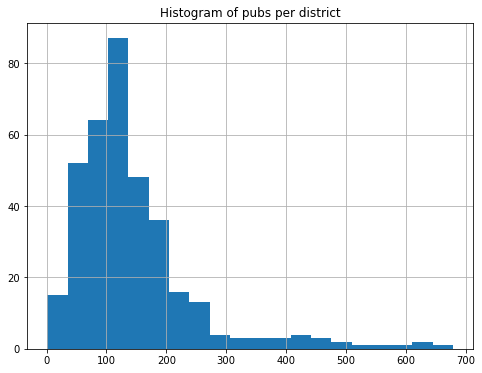

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))
plt.title('Histogram of pubs per district')
pubs.groupby('local_authority').size().hist(bins = 20)
plt.savefig('Hist1.png')